# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

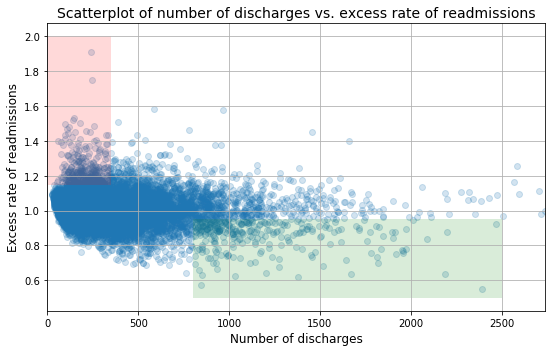

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Question A: Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the analysis or recommendations due to the fact that a legitimate hypothesis test has not been conducted for determining the statistical significance of readmission rate across various hospitals of different sizes. Information on discharges and readmission rates are the only variables analyzed. In addition, no evaluation of variables or correlation coefficients are being analyzed for confirming initial observations. 

Question B: Provide support for your arguments and your own recommendations with a statistically sound analysis.

In [5]:
from scipy.stats import normaltest
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Check for normality of distributions
def check_significance(p_val, alpha):
    if p_val < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [7]:
def normal_hypoth_test(data, alpha):
    
    # calculate statistic & p-value
    statistic, p_val = normaltest(df['Number of Discharges'])
    print('chi-square statistic:',statistic)
    print('p value =',p_val)
    # check significance
    check_significance(p_val, alpha)
    
    return statistic, p_val

In [8]:
df = clean_hospital_read_df
df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


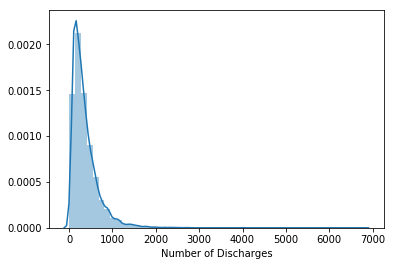

In [9]:
ax = sns.distplot(df['Number of Discharges'])

In [10]:
# Normality test on number of discharges
stat, p_val = normal_hypoth_test(df['Number of Discharges'], alpha=0.05)

chi-square statistic: 8412.44775274452
p value = 0.0
The null hypothesis can be rejected


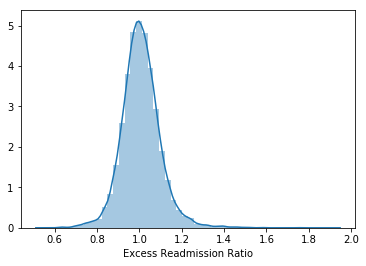

In [11]:
ax = sns.distplot(df['Excess Readmission Ratio'].dropna())

In [12]:
# Hypothesis test for pearson correlation coefficient
from scipy import stats
discharges = df[df['Number of Discharges'] > 0]['Number of Discharges']
readmission = df[df['Number of Discharges'] > 0]['Excess Readmission Ratio']
pho, p_val = stats.pearsonr(discharges, readmission)

print('correlation coefficient:',pho)
print('p value =',p_val)
check_significance(p_val, alpha=0.01)

correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25
The null hypothesis can be rejected


There is a statistically significant correlation between the number of discharges and the excess readmission ratio (p-value = 1.22).

Discuss statistical significance vs. practical significance. Do they differ here?

Statistical significance can be based on the p-value. Practical significance accounts for the overall "effect size". Increasing the sample size can affect the statistical significance. In this scenario, there is statistical signicance but no practical significance. The p-value = 1.22 but the effect size for our correlation coefficient (r = -0.097) is considered very small and can be considered "insignificant". Changes in recommendation can be attributed to misguided assumption that excess readmission is associated with hospital size.

What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

Some of the advantages of using the plot is the visual represenation of the data analyzed in conjunction with the portrayal of information analyzed. Some of the disadvantages may include the lack of analysis as to the variable relationships as well as the lack of information as to the distribution of each variable. 

Construct another plot that conveys the same information in a more direct manner.

In [13]:
# Clean data
columns = ['Provider Number',
           'State',
           'Measure Name',
           'Number of Discharges',
           'Excess Readmission Ratio']

df = hospital_read_df[columns]

columns_rename = ['hospital_id', 'state', 'measure', 'discharges', 'err']

df.columns = columns_rename

In [14]:
# Eliminate null values
df = df[df['discharges'] != 'Not Available']
df.dropna(axis=0, how='any', subset=['err'], inplace=True)

In [15]:
df['discharges'] = pd.to_numeric(df['discharges'])

In [16]:
HF = df[df['measure'] == 'READM-30-HF-HRRP']
PN = df[df['measure'] == 'READM-30-PN-HRRP']
COPD = df[df['measure'] == 'READM-30-COPD-HRRP']
AMI = df[df['measure'] == 'READM-30-AMI-HRRP']
HIP = df[df['measure'] == 'READM-30-HIP-KNEE-HRRP']

In [17]:
df_large = df[df['discharges'] > 100]
df_small = df[df['discharges'] <= 100]

In [18]:
# Pearson correlation coefficient 
overall_r = stats.pearsonr(df['discharges'], df['err'])

HF_r = stats.pearsonr(HF['discharges'], HF['err'])
PN_r = stats.pearsonr(PN['discharges'], PN['err'])
COPD_r = stats.pearsonr(COPD['discharges'], COPD['err'])
AMI_r = stats.pearsonr(AMI['discharges'], AMI['err'])
HIP_r = stats.pearsonr(HIP['discharges'], HIP['err'])

print('overall_r:', round(overall_r[0], 3))
print('HF_r:', round(HF_r[0], 3))
print('PN_r:', round(PN_r[0], 3))
print('COPD_r:', round(COPD_r[0], 3))
print('AMI_r:', round(AMI_r[0], 3))
print('HIP_r:', round(HIP_r[0], 3))

overall_r: -0.097
HF_r: -0.033
PN_r: 0.025
COPD_r: 0.107
AMI_r: -0.145
HIP_r: -0.35


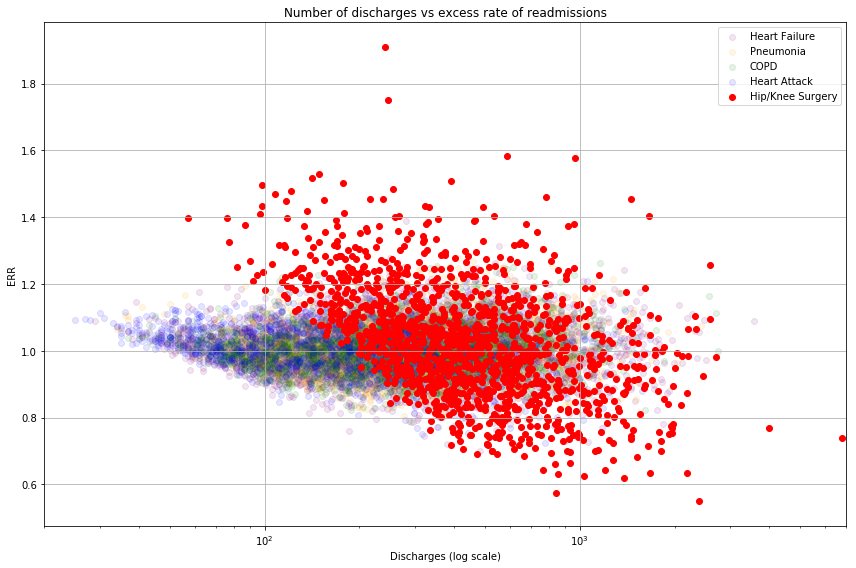

In [19]:
x_HF = [a for a in HF['discharges']]
y_HF = list(HF['err'])

x_PN = [a for a in PN['discharges']]
y_PN = list(PN['err'])

x_COPD = [a for a in COPD['discharges']]
y_COPD = list(COPD['err'])

x_AMI = [a for a in AMI['discharges']]
y_AMI = list(AMI['err'])

x_HIP = [a for a in HIP['discharges']]
y_HIP = list(HIP['err'])

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(x_HF, y_HF, c='purple', alpha=0.1)
_ = ax.scatter(x_PN, y_PN, c='orange', alpha=0.1)
_ = ax.scatter(x_COPD, y_COPD, c='green', alpha=0.1)
_ = ax.scatter(x_AMI, y_AMI, c='blue', alpha=0.1)
_ = ax.scatter(x_HIP, y_HIP, c='red', alpha=1)

_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Discharges (log scale)')
_ = ax.set_ylabel('ERR')
_ = ax.set_title('Number of discharges vs excess rate of readmissions')
_ = ax.legend(['Heart Failure', 'Pneumonia', 'COPD', 'Heart Attack', 'Hip/Knee Surgery'])

ax.grid(True)
fig.tight_layout()